# Loading EM Images into Tensors

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import PIL
import imageio
import libtiff

In [7]:
torch.cuda.set_device(6)

## Set path for data

In [8]:
# Modify accordingly
path = Path('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

dataset_name = 'semi-synthetic_tSEM'

lr_name = f'testing/LR/{dataset_name}/'
lr_path = path/f'{lr_name}'
lr_files = list(lr_path.glob('*.tif'))

hr_name = f'testing/HR/{dataset_name}/'
hr_path = path/f'{hr_name}'
hr_files = list(hr_path.glob('*.tif'))

print('Processing '+str(len(lr_files))+' files...')

Processing 66 files...


In [9]:
def load_img(img_fn):
    """Loads input image into matrix using filename"""
    img = libtiff.TiffFile(img_fn)
    img_mat = img.get_tiff_array()[0].astype(np.float32)[np.newaxis, :]
    return img_mat

In [10]:
# sort filenames so that they are aligned for visualization
lr_files = sorted(lr_files)
hr_files = sorted(hr_files)

## Here we validate that the image tensors are identical to the original image i.e. no information loss 

In [11]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


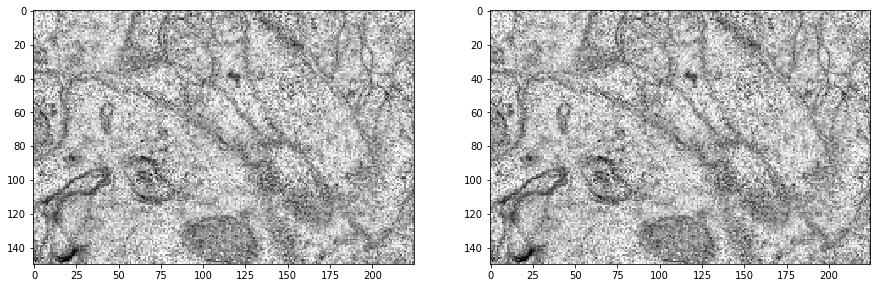

In [12]:
sn = 8 # image number
im = load_img(lr_files[sn]) # load image to tensor
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(im), cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(plt.imread(lr_files[sn]), cmap=plt.cm.gray) # visualize original image file
plt.show() # show visualization

## Here we visualize LR-HR pairs of images for comparison

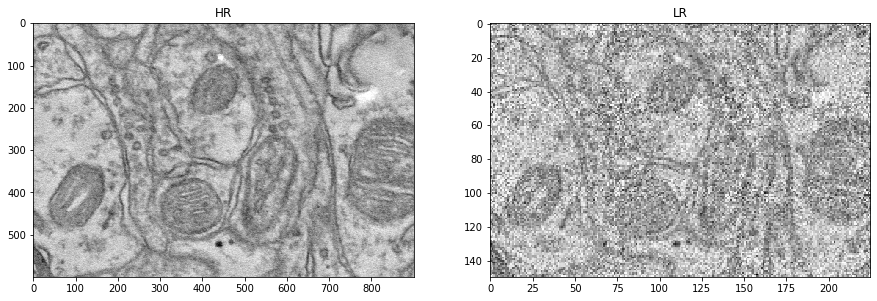

In [13]:
sn = 30 # image number
lr_im = load_img(lr_files[sn]) # load image to tensor
hr_im = load_img(hr_files[sn])
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[0].set_title("HR")
axarr[1].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize original image file
axarr[1].set_title("LR")
plt.show() # show visualization

In [14]:
def visualize_sample(lr_fn, hr_fn):
    lr_im = load_img(lr_fn) # load image to tensor
    hr_im = load_img(hr_fn)
    f, axarr = plt.subplots(1,2) # create visualizations
    axarr[0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
    axarr[0].set_title("HR")
    axarr[1].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize original image file
    axarr[1].set_title("LR")
    plt.show() # show visualization

In [15]:
@interact
def show_sample(sample=10):
    return visualize_sample(lr_files[sample], hr_files[sample])

interactive(children=(IntSlider(value=10, description='sample', max=30, min=-10), Output()), _dom_classes=('wi…

In [16]:
import numpy as np
import czifile
import PIL
import random
from skimage.util import random_noise, img_as_ubyte
from skimage import filters
from skimage.io import imsave
from scipy.ndimage.interpolation import zoom as npzoom
from fastai.vision import *

In [17]:
def new_crappify(img, add_noise=True, scale=4):
    "a crappifier for our microscope images"
    if add_noise:
        img = random_noise(img, mode='salt', amount=0.005)
        img = random_noise(img, mode='pepper', amount=0.005)
        lvar = filters.gaussian(img, sigma=5)
        img = random_noise(img, mode='localvar', local_vars=lvar * 0.5)
    img_down = npzoom(img, 1 / scale, order=1)
    img_up = npzoom(img_down, scale, order=1)
    return img_down, img_up

In [77]:
scale = 4

In [57]:
hr_noise = random_noise(hr_im/hr_im.max(), mode='s&p', amount=0.005)

In [58]:
img = hr_noise

In [82]:
lvar = filters.gaussian(img, sigma=5)
img_blur = random_noise(img, mode='localvar', local_vars=lvar * 0.5)

In [84]:
img_blur

array([[[0.786417, 0.212361, 0.503252, 0.844609, ..., 1.      , 0.564989, 0.385586, 1.      ],
        [0.      , 0.664706, 0.578136, 0.445636, ..., 1.      , 0.      , 1.      , 1.      ],
        [1.      , 0.748418, 1.      , 1.      , ..., 0.747471, 0.275521, 1.      , 0.639567],
        [0.353136, 0.63659 , 0.242702, 0.022138, ..., 1.      , 0.      , 0.422005, 1.      ],
        ...,
        [1.      , 0.663942, 1.      , 0.857803, ..., 0.764277, 0.007917, 0.132772, 0.      ],
        [0.797341, 0.13326 , 0.952666, 0.611962, ..., 0.396358, 0.      , 0.641444, 1.      ],
        [0.65496 , 1.      , 0.610823, 1.      , ..., 0.768643, 0.473869, 0.229069, 0.221781],
        [1.      , 0.      , 0.721277, 0.624895, ..., 0.      , 0.      , 0.742903, 0.953262]]])

In [90]:
lvar

array([[[0.753102, 0.755296, 0.75705 , 0.75823 , ..., 0.728426, 0.727371, 0.725965, 0.724351],
        [0.758559, 0.7608  , 0.762643, 0.763947, ..., 0.72553 , 0.724634, 0.72339 , 0.721936],
        [0.764358, 0.766655, 0.768598, 0.770042, ..., 0.721803, 0.721004, 0.719862, 0.718512],
        [0.770259, 0.772618, 0.774669, 0.776261, ..., 0.717275, 0.716504, 0.715397, 0.714087],
        ...,
        [0.718102, 0.708012, 0.696685, 0.684262, ..., 0.676863, 0.688805, 0.700657, 0.711903],
        [0.727589, 0.716682, 0.704437, 0.691011, ..., 0.680554, 0.692225, 0.70375 , 0.714647],
        [0.735276, 0.723662, 0.710634, 0.696358, ..., 0.683882, 0.695182, 0.706286, 0.716752],
        [0.741229, 0.729009, 0.715319, 0.700335, ..., 0.686761, 0.697627, 0.708256, 0.718246]]], dtype=float32)

In [85]:
img_down = npzoom(img_blur, 1 / scale, order=1)
img_up = npzoom(img_down, scale, order=1)

In [87]:
im

array([[[0.753102, 0.755296, 0.75705 , 0.75823 , ..., 0.728426, 0.727371, 0.725965, 0.724351],
        [0.758559, 0.7608  , 0.762643, 0.763947, ..., 0.72553 , 0.724634, 0.72339 , 0.721936],
        [0.764358, 0.766655, 0.768598, 0.770042, ..., 0.721803, 0.721004, 0.719862, 0.718512],
        [0.770259, 0.772618, 0.774669, 0.776261, ..., 0.717275, 0.716504, 0.715397, 0.714087],
        ...,
        [0.718102, 0.708012, 0.696685, 0.684262, ..., 0.676863, 0.688805, 0.700657, 0.711903],
        [0.727589, 0.716682, 0.704437, 0.691011, ..., 0.680554, 0.692225, 0.70375 , 0.714647],
        [0.735276, 0.723662, 0.710634, 0.696358, ..., 0.683882, 0.695182, 0.706286, 0.716752],
        [0.741229, 0.729009, 0.715319, 0.700335, ..., 0.686761, 0.697627, 0.708256, 0.718246]]], dtype=float32)

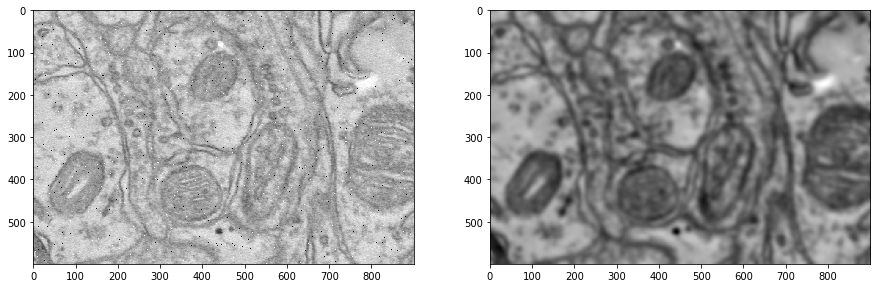

In [89]:
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(img),cmap=plt.cm.gray)
axarr[1].imshow(np.squeeze(lvar),cmap=plt.cm.gray)

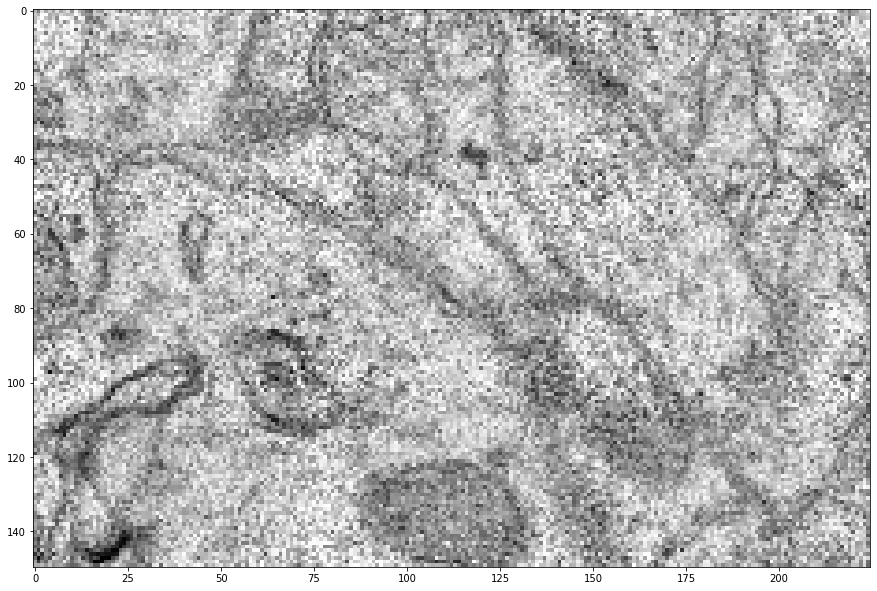

In [42]:
plt.imshow(np.squeeze(im),cmap=plt.cm.gray)